<a href="https://colab.research.google.com/github/PriyankaSharma0925/Tensorflow/blob/main/Medical_Cost_DataSet_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

** Read in the insurance dataset**

In [2]:
dataset=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
dataset.shape

(1338, 7)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##None of the value is missing.##

In [5]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


** One Hot encode the categorial features with pandas get_dummies**


In [6]:
one_hot_encoded_dataset=pd.get_dummies(dataset)

In [7]:
one_hot_encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [8]:
X=one_hot_encoded_dataset.drop("charges", axis=1)

In [9]:
one_hot_encoded_dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [10]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [11]:
y=one_hot_encoded_dataset["charges"]

In [12]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [15]:
len(X_train),len(X_test),len(y_train),len(y_test)

(1070, 268, 1070, 268)

In [16]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


**Create Model**

In [17]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential(
    [tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)]
)

model_1.compile(
    
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

model_1.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13235.9590 - mae: 13235.9590
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12311.1182 - mae: 12311.1182
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12173.6699 - mae: 12173.6699
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12099.2920 - mae: 12099.2920
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11985.4248 - mae: 11985.4248
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11799.9395 - mae: 11799.9395
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11476.8359 - mae: 11476.8359
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10967.0264 - mae: 10967.0264
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10350.2998 - mae: 10350.2998
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9702.670

**Check the model on test data**


In [18]:
model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8962.0615 - mae: 8962.0615


[8962.0615234375, 8962.0615234375]

**Trying model_2 with modyfing hyperparameter epoch=500**




In [19]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential(
    [tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)]
)

model_1.compile(
    
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

model_1.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13235.9590 - mae: 13235.9590
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 12311.1182 - mae: 12311.1182
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 12173.6699 - mae: 12173.6699
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 12099.2920 - mae: 12099.2920
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 11985.4248 - mae: 11985.4248
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 11799.9395 - mae: 11799.9395
Epoch 7/500
34/34 [==============================] - 0s 4ms/step - loss: 11476.8359 - mae: 11476.8359
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 10967.0264 - mae: 10967.0264
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 10350.2998 - mae: 10350.2998
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 9702.670

trying model_3 with modified hyperparameters

In [20]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential(
    [tf.keras.layers.Dense(20),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)]
)

model_3.compile(
    
    optimizer=tf.keras.optimizers.Adam(lr=.01),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

model_3.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=500)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 2ms/step - loss: 13284.6680 - mae: 13284.6680
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 12702.5547 - mae: 12702.5547
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12062.0400 - mae: 12062.0400
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 11912.4561 - mae: 11912.4561
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 11639.8867 - mae: 11639.8867
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 11020.0645 - mae: 11020.0645
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 9977.3955 - mae: 9977.3955
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 8926.4170 - mae: 8926.4170
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 8395.0605 - mae: 8395.0605
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 8290.8340 - mae: 8290.8340

In [21]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential(
    [tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)]
)

model_3.compile(
    
    optimizer=tf.keras.optimizers.Adam(lr=.01),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

model_3.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=500)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 3ms/step - loss: 13109.1191 - mae: 13109.1191
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 12110.5430 - mae: 12110.5430
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 11793.1387 - mae: 11793.1387
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 10923.8604 - mae: 10923.8604
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 9199.9453 - mae: 9199.9453
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 8322.5488 - mae: 8322.5488
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 8292.5820 - mae: 8292.5820
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 8294.8828 - mae: 8294.8828
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 8285.1299 - mae: 8285.1299
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 8288.9150 - mae: 8288.9150
Epo

In [22]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential(
    [tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)]
)

model_4.compile(
    
    optimizer=tf.keras.optimizers.Adam(lr=.001),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

model_4.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13335.7275 - mae: 13335.7275
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13314.8389 - mae: 13314.8389
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13274.5283 - mae: 13274.5283
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13199.7266 - mae: 13199.7266
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13074.9053 - mae: 13074.9053
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12889.0273 - mae: 12889.0273
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12651.0098 - mae: 12651.0098
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12395.2949 - mae: 12395.2949
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12192.5039 - mae: 12192.5039
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12110.98

In [23]:
tf.random.set_seed(42)

model_5=tf.keras.Sequential(
    [tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)]
)

model_5.compile(
    
    optimizer=tf.keras.optimizers.Adam(lr=.001),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

model_5.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=500)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 3ms/step - loss: 13335.7275 - mae: 13335.7275
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13314.8389 - mae: 13314.8389
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 13274.5283 - mae: 13274.5283
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 13199.7266 - mae: 13199.7266
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 13074.9053 - mae: 13074.9053
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 12889.0273 - mae: 12889.0273
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 12651.0098 - mae: 12651.0098
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 12395.2949 - mae: 12395.2949
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 12192.5039 - mae: 12192.5039
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 12110.9824 - mae: 12

In [24]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential(
    [tf.keras.layers.Dense(20),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)]
)

model_3.compile(
    
    optimizer=tf.keras.optimizers.Adam(lr=.01),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

model_3.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=500)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 2ms/step - loss: 13284.6680 - mae: 13284.6680
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 12702.5547 - mae: 12702.5547
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12062.0400 - mae: 12062.0400
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 11912.4561 - mae: 11912.4561
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 11639.8867 - mae: 11639.8867
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 11020.0645 - mae: 11020.0645
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 9977.3955 - mae: 9977.3955
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 8926.4170 - mae: 8926.4170
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 8395.0605 - mae: 8395.0605
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 8290.8340 - mae: 8290.8340

In [25]:
model_5.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8631.8887 - mae: 8631.8887


[8631.888671875, 8631.888671875]

In [26]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential(
    [tf.keras.layers.Dense(60,input_shape=[11],name="FirstDensseLayer"),
     tf.keras.layers.Dense(60,name="lastdenselayer"),
     tf.keras.layers.Dense(30),
     tf.keras.layers.Dense(1)]
)

model_6.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["mae"]
)

history=model_6.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 4ms/step - loss: 13353.5166 - mae: 13353.5166
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 13335.2480 - mae: 13335.2480
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 13314.6299 - mae: 13314.6299
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 13288.7959 - mae: 13288.7959
Epoch 5/500
34/34 [==============================] - 0s 5ms/step - loss: 13254.6914 - mae: 13254.6914
Epoch 6/500
34/34 [==============================] - 0s 4ms/step - loss: 13208.5312 - mae: 13208.5312
Epoch 7/500
34/34 [==============================] - 0s 4ms/step - loss: 13146.3223 - mae: 13146.3223
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 13062.6318 - mae: 13062.6318
Epoch 9/500
34/34 [==============================] - 0s 4ms/step - loss: 12950.5156 - mae: 12950.5156
Epoch 10/500
34/34 [==============================] - 0s 5ms/step - loss: 12802.67

In [29]:
model_6.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3667.5598 - mae: 3667.5598


[3667.559814453125, 3667.559814453125]

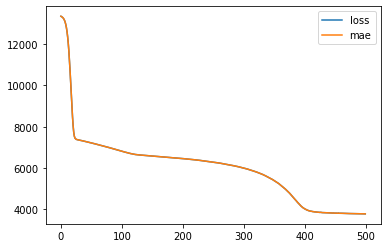

In [30]:
pd.DataFrame(history.history).plot()